In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
## Read the CSV File Using Pandas read_csv function
df = pd.read_csv(r'/content/drive/MyDrive/oasis_cross-sectional.csv')

# print the concise summery of the dataset
df.info()

FileNotFoundError: ignored

In [ ]:
print("Total Rows and Columns (Rows,Columns) : ",df.shape)
#print first five rows of the dataset
df.head(5)

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#print concise summary of the dataset
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [ ]:
#since the dataset contain null values also
#count total rows in each column which contain null values
df.isna().sum()


Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [ ]:
#'duplicated()' function in pandas return the duplicate row as True and othter as False
#for counting the duplicate elements we sum all the rows
sum(df.duplicated())

0

In [ ]:
#fill null value with their column mean and median
df["SES"].fillna(df["SES"].median(), inplace=True)
df["MMSE"].fillna(df["MMSE"].mean(), inplace=True)

<AxesSubplot:xlabel='Group', ylabel='count'>

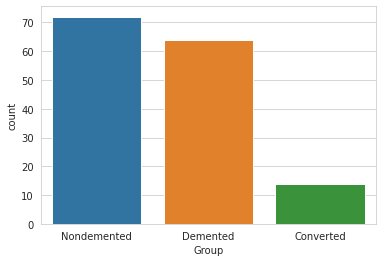

In [ ]:
#see how many people have Alzheimer
#same person visits two or more times so only take the single visit data
sns.set_style("whitegrid")
ex_df = df.loc[df['Visit'] == 1]
sns.countplot(x='Group', data=ex_df)

/tmp/ipykernel_4135/955989189.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_df['Group'] = ex_df['Group'].replace(['Converted'], ['Demented'])


<AxesSubplot:xlabel='Group', ylabel='count'>

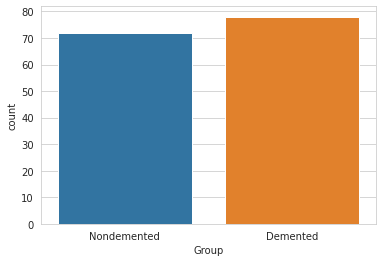

In [ ]:
#We have three groups so convert Converted Group Into Demented

ex_df['Group'] = ex_df['Group'].replace(['Converted'], ['Demented'])
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
sns.countplot(x='Group', data=ex_df)


              M   F
Demented     40  38
Nondemented  22  50


Text(0.5, 1.0, 'Gender and Demented rate')

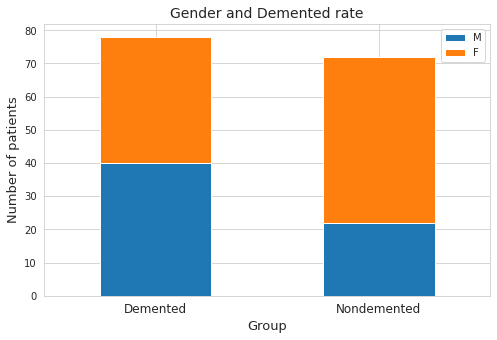

In [ ]:
# bar drawing function
def bar_chart(feature):
    Demented = ex_df[ex_df['Group']=='Demented'][feature].value_counts()
    Nondemented = ex_df[ex_df['Group']=='Nondemented'][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))
    print(df_bar)


# Gender  and  Group ( Female=0, Male=1)
bar_chart('M/F')
plt.xlabel('Group',fontsize=13)
plt.xticks(rotation=0,fontsize=12)
plt.ylabel('Number of patients',fontsize=13)
plt.legend()
plt.title('Gender and Demented rate',fontsize=14)

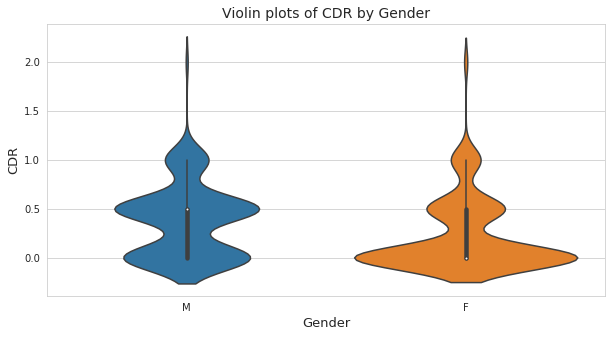

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x='M/F', y='CDR', data=df)
plt.title('Violin plots of CDR by Gender',fontsize=14)
plt.xlabel('Gender',fontsize=13)
plt.ylabel('CDR',fontsize=13)
plt.show()

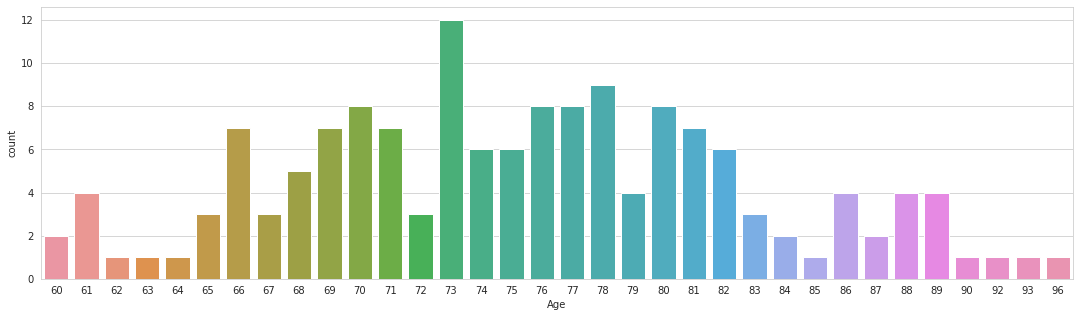

In [ ]:
ax = sns.countplot(x='Age', data=ex_df)
ax.figure.set_size_inches(18.5, 5)


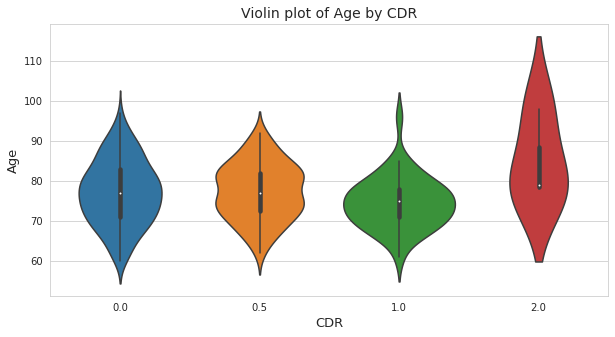

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x='CDR', y='Age', data=df)
plt.title('Violin plot of Age by CDR',fontsize=14)
plt.xlabel('CDR',fontsize=13)
plt.ylabel('Age',fontsize=13)
plt.show()

(50.0, 100.0)

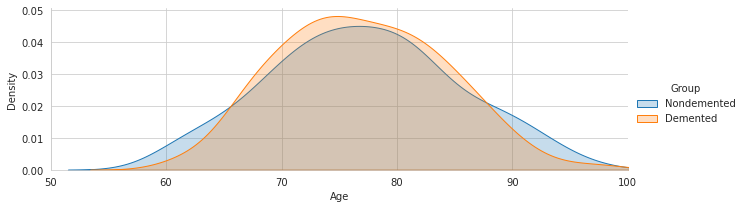

In [ ]:
#AGE vs Non-demented and demented
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(50,100)

In [ ]:
#find the outliers in each of the column
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

list_atributes = ['MR Delay','EDUC', "SES", "MMSE", 'eTIV', "nWBV", "ASF"]
print("Outliers: \n")
for item in list_atributes:
    print(item,': ',outliers_iqr(df[item]))

Outliers: 

MR Delay :  (array([ 32,  71,  75, 153, 159, 160, 265, 369]),)
EDUC :  (array([107, 108, 109]),)
SES :  (array([136, 137, 138, 161, 162, 179, 180]),)
MMSE :  (array([  4,  25,  26,  43,  44,  51,  52,  60,  88,  89,  90,  93,  94,
        97,  98,  99, 100, 101, 105, 106, 138, 162, 172, 173, 184, 185,
       186, 222, 225, 226, 231, 232, 234, 251, 299, 300, 316, 317, 328,
       332, 360, 366]),)
eTIV :  (array([0, 1]),)
nWBV :  (array([], dtype=int64),)
ASF :  (array([282]),)


In [ ]:
#convert the charecter data into numeric
group_map = {"Demented": 1, "Nondemented": 0}

df['Group'] = df['Group'].map(group_map)
df['M/F'] = df['M/F'].replace(['F','M'], [0,1])

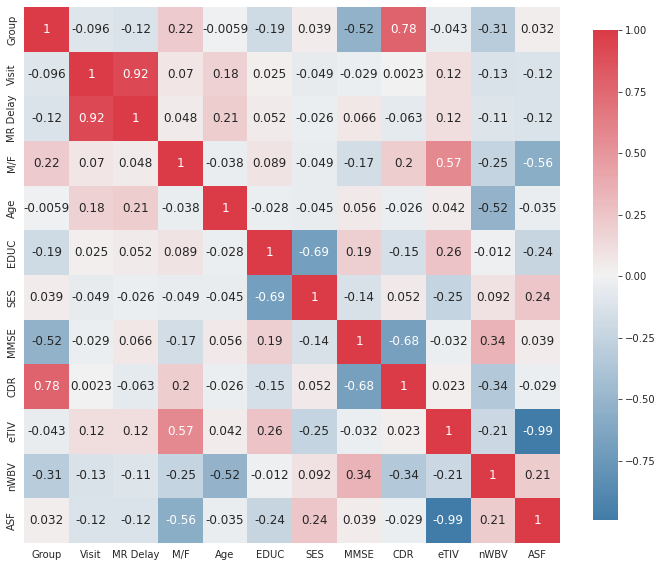

In [ ]:
def plot_correlation_map( df ):
    corr = df.corr(numeric_only=True)
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })
plot_correlation_map(df)


In [ ]:
# Encode columns into numeric
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [ ]:
from sklearn.model_selection import train_test_split

feature_col_names = ["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"]
predicted_class_names = ['Group']

X = df[feature_col_names].values
y = df[predicted_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
pip install lightgbm


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
import itertools

In [ ]:
rfc=RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [200],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,scoring = 'roc_auc')
CV_rfc.fit(X_train, y_train.ravel())
print("Best parameters set found on development set:")
print(CV_rfc.best_params_)
y_pred = CV_rfc.predict(X_test)
print("Classification Accuracy:", accuracy_score(y_test, y_pred))
rd_acc=accuracy_score(y_test,y_pred)
print("Classification Report: \n")
print(classification_report(y_test, y_pred))
print("Confusion Matrix: \n")
print(confusion_matrix(y_test, y_pred))

Best parameters set found on development set:
{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 200}
Classification Accuracy: 0.8392857142857143
Classification Report: 

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        52
           1       0.88      0.82      0.84        60

    accuracy                           0.84       112
   macro avg       0.84      0.84      0.84       112
weighted avg       0.84      0.84      0.84       112

Confusion Matrix: 

[[45  7]
 [11 49]]


/tmp/ipykernel_4135/1791962144.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


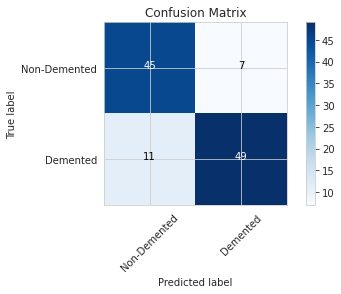

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
classes = ['Non-Demented', 'Demented']
# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
ad=AdaBoostClassifier(n_estimators=50, random_state=42)
ad.fit(X_train,y_train.ravel())
X = pd.DataFrame(X_train)
y_pred = ad.predict(X_test)
print("Classification Accuracy:", accuracy_score(y_test, y_pred))
ad_acc=accuracy_score(y_test,y_pred)
print("Classification Report: \n")
print(classification_report(y_test, y_pred))
print("Confusion Matrix: \n")
print(confusion_matrix(y_test, y_pred))

Classification Accuracy: 0.8035714285714286
Classification Report: 

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        52
           1       0.82      0.82      0.82        60

    accuracy                           0.80       112
   macro avg       0.80      0.80      0.80       112
weighted avg       0.80      0.80      0.80       112

Confusion Matrix: 

[[41 11]
 [11 49]]


/tmp/ipykernel_4135/1791962144.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


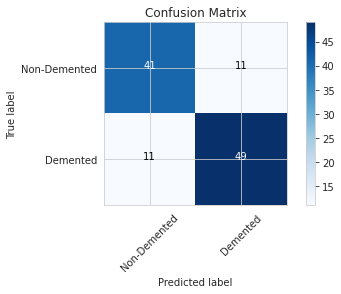

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
classes = ['Non-Demented', 'Demented']
# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train,y_train.ravel())
X = pd.DataFrame(X_train)
y_pred = lgbm.predict(X_test)
print("Classification Accuracy:", accuracy_score(y_test, y_pred))
lgbm_acc = accuracy_score(y_test,y_pred)
print("Classification Report: \n")
print(classification_report(y_test, y_pred))
print("Confusion Matrix: \n")
print(confusion_matrix(y_test, y_pred))

Classification Accuracy: 0.8035714285714286
Classification Report: 

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        52
           1       0.84      0.78      0.81        60

    accuracy                           0.80       112
   macro avg       0.80      0.81      0.80       112
weighted avg       0.81      0.80      0.80       112

Confusion Matrix: 

[[43  9]
 [13 47]]


/tmp/ipykernel_4135/1791962144.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


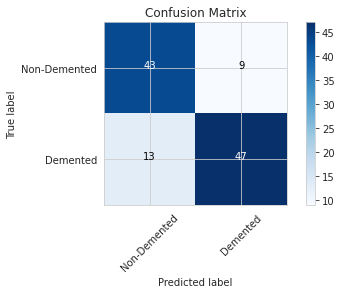

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
classes = ['Non-Demented', 'Demented']
# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
xgb = XGBClassifier(random_state=0)
xgb.fit(X_train, y_train.ravel())
y_pred = xgb.predict(X_test)
print("Classification Accuracy:", accuracy_score(y_test, y_pred))
xgb_acc = accuracy_score(y_test,y_pred)
print("Classification Report: \n")
print(classification_report(y_test, y_pred))
print("Confusion Matrix: \n")
print(confusion_matrix(y_test, y_pred))

Classification Accuracy: 0.8392857142857143
Classification Report: 

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        52
           1       0.86      0.83      0.85        60

    accuracy                           0.84       112
   macro avg       0.84      0.84      0.84       112
weighted avg       0.84      0.84      0.84       112

Confusion Matrix: 

[[44  8]
 [10 50]]


/tmp/ipykernel_4135/1791962144.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


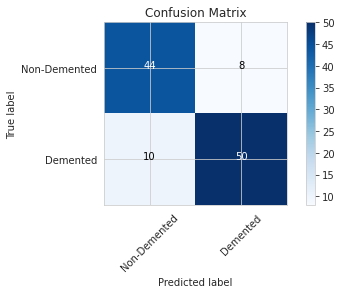

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
classes = ['Non-Demented', 'Demented']
# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

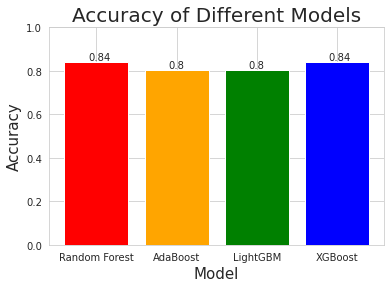

In [ ]:
classifiers = ['Random Forest','AdaBoost','LightGBM','XGBoost']
accuracies = [rd_acc, ad_acc, lgbm_acc, xgb_acc]
plt.bar(classifiers, accuracies, color=['red', 'orange', 'green','blue'])
plt.title('Accuracy of Different Models',fontsize = 20)
plt.xlabel('Model',fontsize = 15)
plt.ylabel('Accuracy',fontsize = 15)
plt.ylim([0, 1])
for i, v in enumerate(accuracies):
    plt.text(i-0.1, v+0.01, str(round(v, 2)))
plt.show()